![header](https://i.imgur.com/I4ake6d.jpg)


<h1><center><b>Open and Visualize NetCDF files in Python</b></center></h1>


---

# Table of contents
- [1. Context](#Context)
    - [1.1. Import Modules](#Import-Modules)
- [2. Use Case: Atlantic-Iberian Biscay Irish Ocean Physics Data](#Use-Case-Example)
- [3. Data Exploration](#Data-Exploration)
- [4. Plot Data](#Plot-Data)
    - [4.1. Your First 2D maps](#Your-First-2D-maps)
    - [4.2. Temporal Dimension](#Temporal-dimension)
    - [4.3. Depth Profile](#Depth-Profile)
- [5. Data Extraction](#Data-Extraction)
- [6. Conclusion](#Conclusion) 
- [7. CSV](#Para-pasar-a-CSV) 
---

## Context
[Go back to the "Table of contents"](#Table-of-contents)

In the following Jupyter Notebook, you will find the main steps to open, visualize and manipulate <a href=https://marine.copernicus.eu/>Copernicus Marine data</a>, delivered in standard <a href="https://help.marine.copernicus.eu/en/articles/4427604-what-is-the-format-of-copernicus-marine-products-netcdf"><b>NetCDF</b></a> file format, within <b>Python</b>. <br/>

We'll go through a step by step process as listed in the [Table of Contents](#Table-of-contents) above.

<div style='border: solid 0.5px; padding-left:0.7em;'>
<em><h5><b>⚠️ Prerequisites:</b></h5>
All Copernicus Marine products and data access services are free of charges, however to follow this notebook and explore data, you will need a <a href="https://resources.marine.copernicus.eu/registration-form">Copernicus Marine Account</a>.
</em>
    </div>


### Import Modules

There are several packages available in Python to open and plot a netCDF file. 
Here is a table resuming the main modules used in this notebook: 

| Module name | Description |
| :---: | :--- |
| **[`xarray`](https://docs.xarray.dev/en/stable/getting-started-guide/index.html)** | Module to easily work with labelled multi-dimensional arrays |
| **[`matplotlib`](https://matplotlib.org/stable/users/index)** | Library for creating static, animated, and interactive visualizations |
| **[`cartopy`](https://scitools.org.uk/cartopy/)** | Package designed for geospatial data processing in order to produce maps and other geospatial data analyses |
| **[`copernicusmarine`](https://help.marine.copernicus.eu/en/articles/7970514-copernicus-marine-toolbox-installation)** | Allow users to browse and download easily all the products of the Copernicus Marine Data Store |

An existing and detailed documentation is extremly useful and the use is advised. A lot of good examples using <code>xarray</code> and <code>matplotlib</code> are available and easy to understand. 


In [ ]:
# Syntax to install modules 
#!pip install xarray

In [1]:
from IPython.display import IFrame
%matplotlib inline
import matplotlib.pyplot as plt
import getpass
import xarray as xr
import panel.widgets as pnw
import panel as pn
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import copernicusmarine

# To avoid warning messages
import warnings
warnings.filterwarnings('ignore')

---

## Use Case Example
For the example of this notebook, we will explore the [Atlantic-Iberian Biscay Irish-Ocean Physics Analysis and Forecast](https://data.marine.copernicus.eu/product/IBI_ANALYSISFORECAST_PHY_005_001/description) Marine product, available from the [Copernicus Marine Data Store](https://resources.marine.copernicus.eu/products), to study the **monthly variation of ocean salinity and temperature over one year** (here the 2021). 

#### _Get more info on the product_
1. In the product information page ([INFORMATION](https://resources.marine.copernicus.eu/product-detail/IBI_ANALYSISFORECAST_PHY_005_001/INFORMATION) sheet) you have access to various information, a general overview of the product and to the product documentation, both technical and scientific.
2. On the ["Data access"](https://data.marine.copernicus.eu/product/IBI_ANALYSISFORECAST_PHY_005_001/services) sheet you have the list of available services to retrieve the desired data.
    
#### Parameters Selection
For our use case, we will focus on the following parameters: 

| Parameter | Value |
| :---: | :---|
| **ProductID** | IBI_ANALYSISFORECAST_PHY_005_001 |
| **DatasetID of interest** | `cmems_mod_ibi_phy_anfc_0.027deg-3D_P1M-m` |
| **Product type** | numerical model |
| **Spatial Resolution** | 0.028° × 0.028° |
| **Temporal resolution** | monthly-mean |
| **Temporal coverage** | from 2021-01-01 to 2021-12-31 |
| **Vertical coverage** |from -5500m to 0m |
| **Ocean Variables of interest** | `thetao`, `so` |

We can therefore already define the different product's information that will be useful to connect and access the service:

In [4]:
## Product's parameter
datasetID = 'cmems_mod_ibi_phy_anfc_0.027deg-3D_P1M-m'

---
## Data Exploration

The Copernicus Marine Service provides several mechanisms for users to access and obtain its products: _[Copernicus Marine Client API - Open a dataset or read a dataframe remotely](https://help.marine.copernicus.eu/en/articles/8287609-copernicus-marine-client-api-open-a-dataset-or-read-a-dataframe-remotely#h_71eee6dbce)_ \
⚠️ For all of them, your Copernicus Marine credentials are **required**.

For our use case, we will access the data with the [copernicusmarine](https://help.marine.copernicus.eu/en/articles/7949409-copernicus-marine-client-introduction) toolbox.

To start, let's first open the **entire dataset**, that we'll store in the variable <code>DS</code>. \
We will see later how to select parameters (cf. [Plot Data](#Plot-Data)).

In [5]:
DS = copernicusmarine.open_dataset(dataset_id = datasetID)
DS

INFO - 2024-08-29T22:41:20Z - Dataset version was not specified, the latest one was selected: "202211"
INFO - 2024-08-29T22:41:20Z - Dataset part was not specified, the first one was selected: "default"
INFO - 2024-08-29T22:41:22Z - Service was not specified, the default one was selected: "arco-geo-series"


<xarray.Dataset>
Dimensions:    (depth: 50, latitude: 1081, longitude: 865, time: 44)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 26.0 26.03 26.06 26.08 ... 55.94 55.97 56.0
  * longitude  (longitude) float32 -19.0 -18.97 -18.94 ... 4.944 4.972 5.0
  * time       (time) datetime64[ns] 2020-12-01 2021-01-01 ... 2024-07-01
Data variables:
    bottomT    (time, latitude, longitude) float32 ...
    mlotst     (time, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
    zos        (time, latitude, longitude) float32 ...
Attributes: (12/21)
    Conventions:     CF-1.0
    bulletin_date:   2020-12-31
    bulletin_type:   Operational
    contact:         mailto: servicedesk.cmems@mercator-ocean.eu
    domain_name:     IBI36
    easting:         longitude
    ...              ...
    northing:        latitude
    references:      http://marine.copernicus.eu/
    source:          NEMO3.6
    title:           Ocean 3D monthly mean fields for the Iberia-Biscay-Irela...
    z_max:           5727.917f
    z_min:           0.49402f

And we obtain the overview of the dataset <code>cmems_mod_ibi_phy_anfc_0.027deg-3D_P1M-m</code>.

💡 <em><b>Copernicus Marine Pro Tip:</b> You can click on buttons to interact with the metadata of the file and confirm that it contains the requested subset of data.</em>

<div style='border: solid 0.5px; padding-left:0.7em; padding-bottom:0.7em;' >
    <em><h5><b><em>📌 Note:</em></b></h5>
    We explore here the data via a remote connection, however, the <b>same functions can be applied to a downloeded netCDF file</b>. In this case, the first step would be to open the file from the its folder directory as follows:\
    <center><code>nc_file = xr.open_dataset('my_directory/filename.nc')</code></center>
</em>
    </div>


#### _Get info about the dataset_
If instead we prefer to focus on only some specific information, here are some examples: 

In [7]:
# General information about the data
DS.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:    (depth: 50, latitude: 1081, longitude: 865, time: 44)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 26.0 26.03 26.06 26.08 ... 55.94 55.97 56.0
  * longitude  (longitude) float32 -19.0 -18.97 -18.94 ... 4.944 4.972 5.0
  * time       (time) datetime64[ns] 2020-12-01 2021-01-01 ... 2024-07-01
Data variables:
    bottomT    (time, latitude, longitude) float32 ...
    mlotst     (time, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
    zos        (time, latitude, longitude) float32 ...
Attributes: (12/21)
    Conventions:     CF-1.0
    bulletin_date:   2020-12-31
    bulletin_type:   Operational
    contact:         mailto: 

In [8]:
# Get the full list of variables available in the dataset
DS.data_vars

Data variables:
    bottomT  (time, latitude, longitude) float32 ...
    mlotst   (time, latitude, longitude) float32 ...
    so       (time, depth, latitude, longitude) float32 ...
    thetao   (time, depth, latitude, longitude) float32 ...
    uo       (time, depth, latitude, longitude) float32 ...
    vo       (time, depth, latitude, longitude) float32 ...
    zos      (time, latitude, longitude) float32 ...

In [9]:
# Get the list of dimensions
DS.coords

Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 26.0 26.03 26.06 26.08 ... 55.94 55.97 56.0
  * longitude  (longitude) float32 -19.0 -18.97 -18.94 ... 4.944 4.972 5.0
  * time       (time) datetime64[ns] 2020-12-01 2021-01-01 ... 2024-07-01

In [10]:
# Get info on one specific variable (here the temperature)
DS.thetao

<xarray.DataArray 'thetao' (time: 44, depth: 50, latitude: 1081, longitude: 865)>
[2057143000 values with dtype=float32]
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 26.0 26.03 26.06 26.08 ... 55.94 55.97 56.0
  * longitude  (longitude) float32 -19.0 -18.97 -18.94 ... 4.944 4.972 5.0
  * time       (time) datetime64[ns] 2020-12-01 2021-01-01 ... 2024-07-01
Attributes:
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    unit_long:      degrees_C
    units:          degrees_C
    valid_max:      22000
    valid_min:      -12000

In [11]:
# Get info on specific dimensions 
DS.depth, DS.time

(<xarray.DataArray 'depth' (depth: 50)>
 array([4.940250e-01, 1.541375e+00, 2.645669e+00, 3.819495e+00, 5.078224e+00,
        6.440614e+00, 7.929560e+00, 9.572997e+00, 1.140500e+01, 1.346714e+01,
        1.581007e+01, 1.849556e+01, 2.159882e+01, 2.521141e+01, 2.944473e+01,
        3.443415e+01, 4.034405e+01, 4.737369e+01, 5.576429e+01, 6.580727e+01,
        7.785385e+01, 9.232607e+01, 1.097293e+02, 1.306660e+02, 1.558507e+02,
        1.861256e+02, 2.224752e+02, 2.660403e+02, 3.181274e+02, 3.802130e+02,
        4.539377e+02, 5.410889e+02, 6.435668e+02, 7.633331e+02, 9.023393e+02,
        1.062440e+03, 1.245291e+03, 1.452251e+03, 1.684284e+03, 1.941893e+03,
        2.225078e+03, 2.533336e+03, 2.865703e+03, 3.220820e+03, 3.597032e+03,
        3.992484e+03, 4.405224e+03, 4.833291e+03, 5.274784e+03, 5.727917e+03],
       dtype=float32)
 Coordinates:
   * depth    (depth) float32 0.494 1.541 2.646 ... 4.833e+03 5.275e+03 5.728e+03
 Attributes:
     axis:           Z
     long_name:      Dept

---
## Plot Data
#### Your First 2D maps
Now, that we have seen how to connect to the dataset of interest and explore the main information, let's focus on the period and variables we are interested in. 

We create a subsetted dataset, by indicating the needed parameters (cf. [parameters selection](#Parameters-selection)), that we'll extract from our dataset <code>DS</code>, using the <code>.sel()</code> and <code>.isel()</code> functions of <code>xarray</code> (for [more info](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.sel.html)).

In [12]:
subset = DS[['thetao','so']].sel(time = slice("2021-01-01", "2021-12-31"))
subset

<xarray.Dataset>
Dimensions:    (time: 12, depth: 50, latitude: 1081, longitude: 865)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 26.0 26.03 26.06 26.08 ... 55.94 55.97 56.0
  * longitude  (longitude) float32 -19.0 -18.97 -18.94 ... 4.944 4.972 5.0
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Data variables:
    thetao     (time, depth, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
Attributes: (12/21)
    Conventions:     CF-1.0
    bulletin_date:   2020-12-31
    bulletin_type:   Operational
    contact:         mailto: servicedesk.cmems@mercator-ocean.eu
    domain_name:     IBI36
    easting:         longitude
    ...              ...
    northing:        latitude
    references:      http://marine.copernicus.eu/
    source:          NEMO3.6
    title:           Ocean 3D monthly mean fields for the Iberia-Biscay-Irela...
    z_max:           5727.917f
    z_min:           0.49402f

As first simple plot, we choose to visualize the **temperature at the ocean surface, on January 2021**. 

In [13]:
target_date = "2021-01"     # January 2021
target_depth = 0            # Sea Surface level
subset_T = subset.thetao.isel(depth=target_depth).sel(time = target_date, method = 'nearest')             # method='nearest' -> Method to use for inexact matches (use the nearest valid index value)
subset_T

<xarray.DataArray 'thetao' (latitude: 1081, longitude: 865)>
[935065 values with dtype=float32]
Coordinates:
    depth      float32 0.494
  * latitude   (latitude) float32 26.0 26.03 26.06 26.08 ... 55.94 55.97 56.0
  * longitude  (longitude) float32 -19.0 -18.97 -18.94 ... 4.944 4.972 5.0
    time       datetime64[ns] 2021-01-01
Attributes:
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    unit_long:      degrees_C
    units:          degrees_C
    valid_max:      22000
    valid_min:      -12000

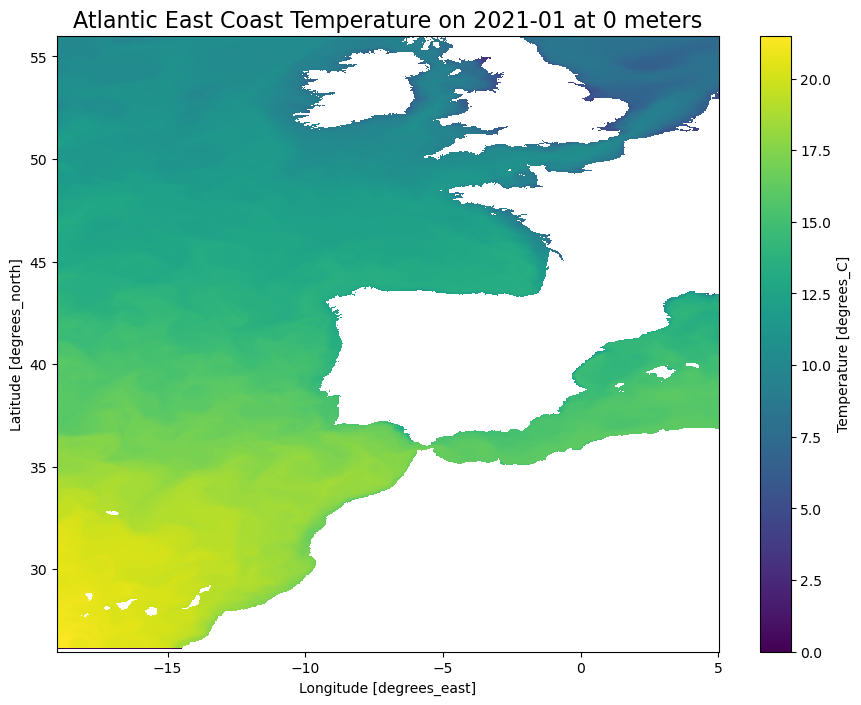

In [15]:
## Plot 
subset_T.plot(size = 8)

## Add title
title = f'Atlantic East Coast {subset_T.long_name} on {str(target_date)} at {str(target_depth)} meters'       # set the title
plt.title(title, fontsize=16);

#### _Customized plot_
In the figure above we chose to plot the whole geographical area with the simple <code>xarray</code>'s function <code>.plot()</code>. \
We can however **zoom** on a specific area and **customize** the plot by adding some details and personalising it, using the `matplotlib` package.

For this example, we'll focus on the **Portuguese coasts**, whose we define the geographical coordinates <code>port_lon</code> and <code>port_lat</code>:

In [16]:
port_lon = slice(-11.77, -7.22)     #longitude
port_lat = slice(36.74, 42.22)    #latitude

In [17]:
# Open the sea water temperature in the "new" subset
port_T = DS.thetao.sel(longitude = port_lon, latitude = port_lat)
port_T

<xarray.DataArray 'thetao' (time: 44, depth: 50, latitude: 197, longitude: 164)>
[71077600 values with dtype=float32]
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * latitude   (latitude) float32 36.75 36.78 36.81 36.83 ... 42.14 42.17 42.19
  * longitude  (longitude) float32 -11.75 -11.72 -11.69 ... -7.278 -7.25 -7.222
  * time       (time) datetime64[ns] 2020-12-01 2021-01-01 ... 2024-07-01
Attributes:
    long_name:      Temperature
    standard_name:  sea_water_potential_temperature
    unit_long:      degrees_C
    units:          degrees_C
    valid_max:      22000
    valid_min:      -12000

And we generate the 2D map over this region:

Text(0.5, 1.0, 'Portugal - Temperature on 2021-01 at 0 meters')

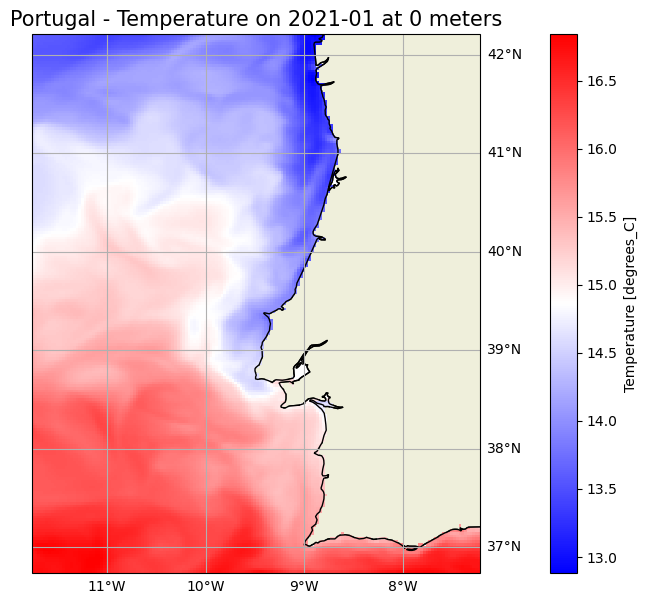

In [18]:
## Add coastlines and land feature 
f = plt.figure(figsize=(18, 7))                                                                      # define the size of the plot
ax = plt.axes(projection=ccrs.PlateCarree())                                                         # define the projection                                    
ax.coastlines()                                                                                      # add the coastlines
ax.add_feature(cfeature.LAND, zorder=1, edgecolor='k')                                               # add continent
gl = ax.gridlines(draw_labels=True)                                                                  # add gridlines
gl.left_labels = False                                                                               # remove latitude labels on the right
gl.top_labels = False                                                                                # remove longitude labels on the top

## Generate plot with colobar
port_T.sel(time=target_date).isel(depth=target_depth).plot(cmap='bwr')                                                                      # cmap -> colorbar                                                   

## Add title
plt.title(f'Portugal - {port_T.long_name} on {str(target_date)} at {str(target_depth)} meters' , fontsize=15)   # add title to the plot

## Temporal dimension

### _2D maps_
It is also possible to observe the **evolution of a variable over time**, through 2D graphs.

In [19]:
# Define the target period of interest (from January to December 2021)
target_t_period=slice("2021-01-01","2021-12-31")

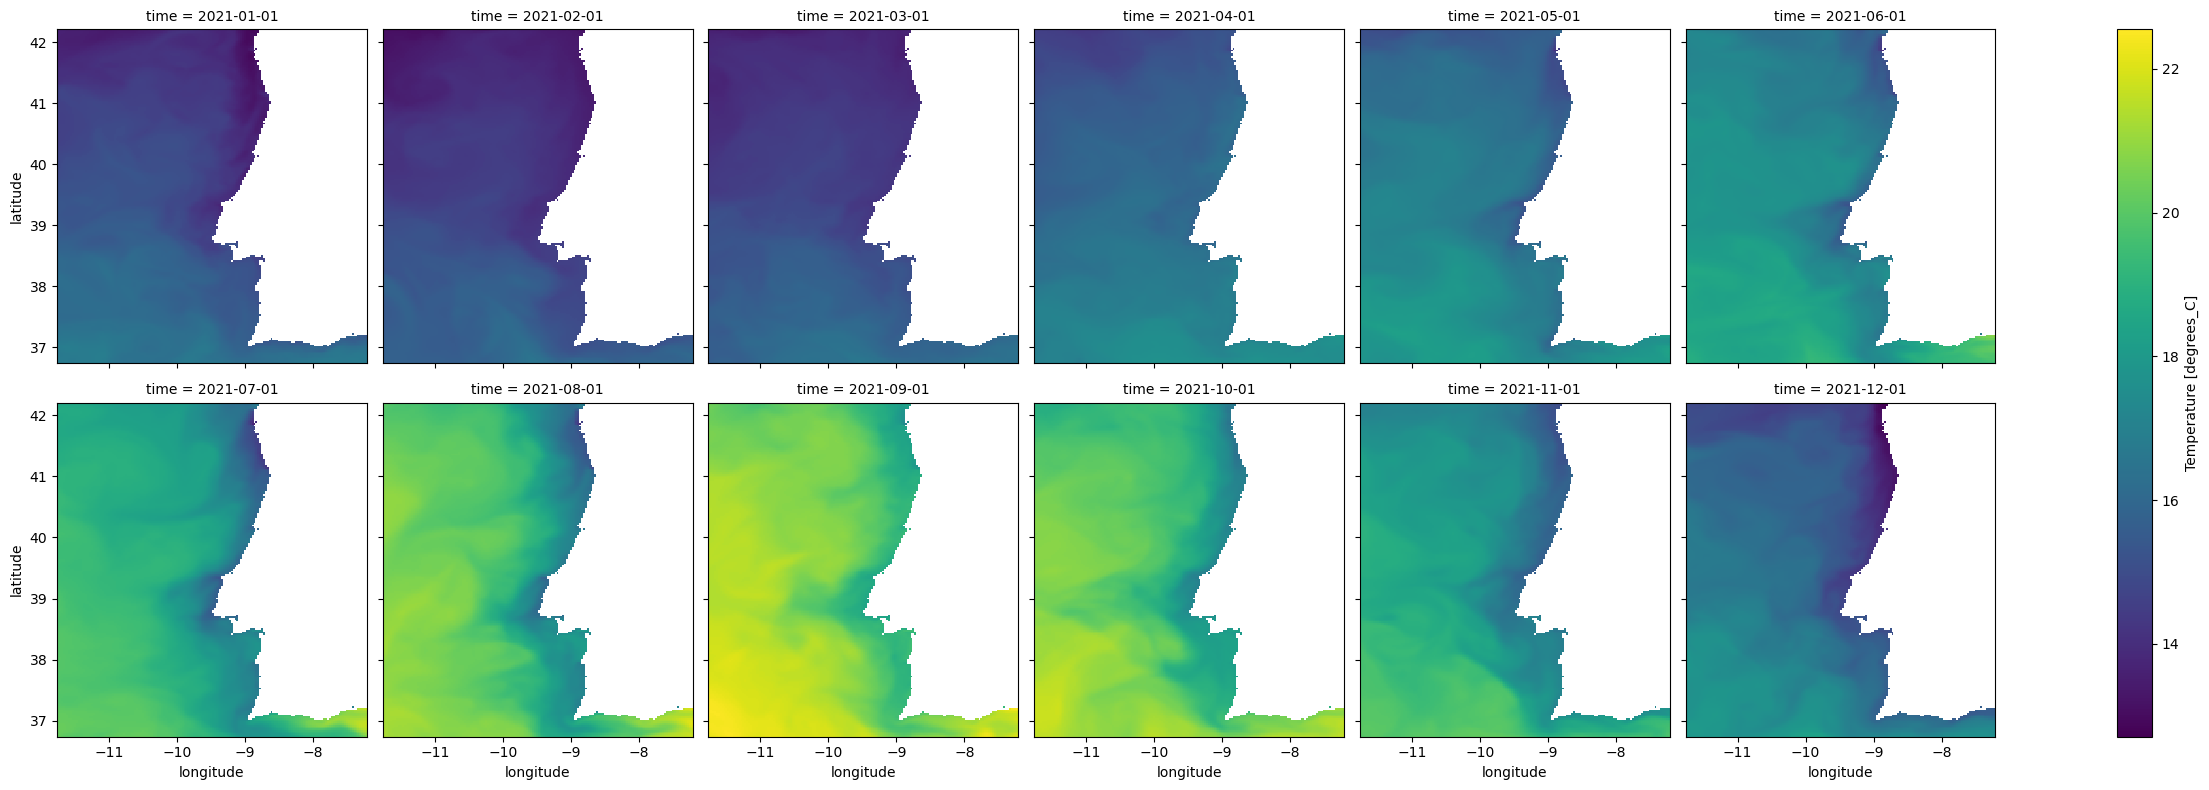

In [21]:
# Call the new subset 
t_evolution = port_T.sel(time=target_t_period).isel(depth=target_depth)
#plot
t_evolution.plot(col="time", col_wrap=6, size=4)     # each row has a maximum of 6 columns

We obtain as many 2D graphs as the number of time steps: <br/>
for our example, we have 12 graphs, one per month, where we can easily observe the monthly evolution of the sea surface temperature.

### _Process a timeseries_
Now, let's create a timeseries of the temperature `thetao` evolution for a geographical **gridpoint**, to observe its monthly evolution.

In [28]:
# we define the lon/lat coordinates
gridpoint_lon = -9.541       #longitude
gridpoint_lat = 38.718       #latitude

Text(0.5, 1.0, 'Portugal - Monthly evolution of Temperature on 2021')

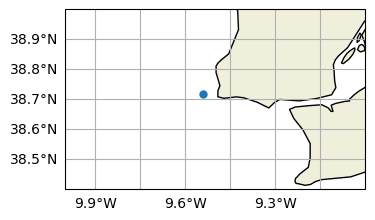

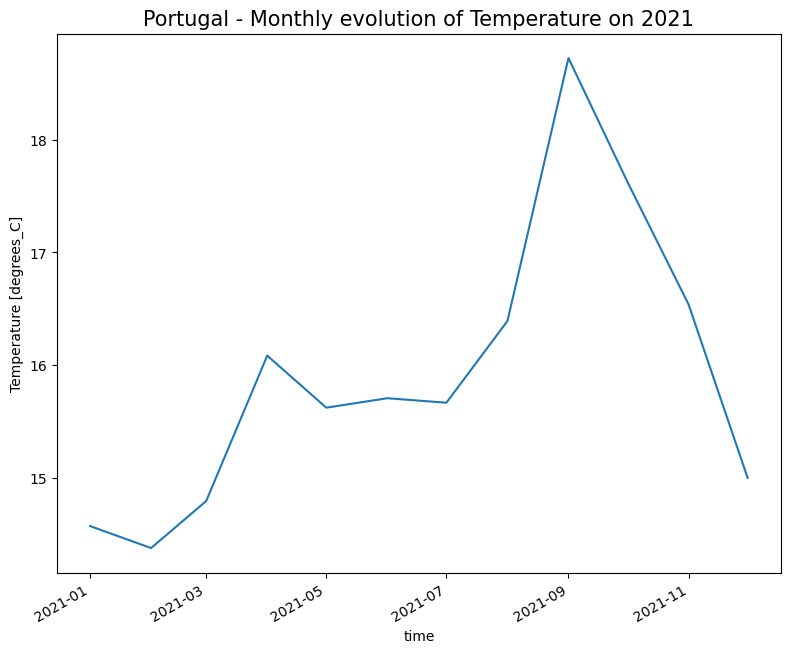

In [29]:
f = plt.figure(figsize=(10,10))                                                                           # define plot size

## Display the locations of the glider on a mini map
ax_mini_map = f.add_axes([0.5, 1, 0.3, 0.2], projection=ccrs.PlateCarree())                               # create the minimap and define its projection
gl = ax_mini_map.gridlines(draw_labels=True)                                                              # add the lon/lat gridlines
gl.right_labels = False                                                                                   # remove latitude labels on the right
gl.top_labels = False                                                                                     # remove longitude labels on the top

# Customize mini map
ax_mini_map.add_feature(cfeature.LAND, zorder=0, edgecolor='k')                                           # add land mask 
ax_mini_map.set_extent([-10, -9, 38.4, 39], crs = ccrs.PlateCarree())                                      # define the extent of the mini map [lon_min,lon_max,lat_min,lat_max]
ax_mini_map.scatter(gridpoint_lon, gridpoint_lat, 25,'tab:blue',transform=ccrs.PlateCarree())             # plot location of point


## Plot the 1D plot, at the surface and for the target period (year 2021)
t_thetao = t_evolution.sel(longitude=gridpoint_lon, latitude=gridpoint_lat, method='nearest')
t_thetao.plot(size=7)    # define the parameters to plot
plt.title(f"Portugal - Monthly evolution of {t_evolution.long_name} on 2021", fontsize=15)     # add title

We can also compare two variables between them and observe the evolution:

In [30]:
# Open the new subset for salinity
port_S = DS.so.sel(longitude = port_lon, latitude = port_lat, time = target_t_period).isel(depth = target_depth)
port_S

<xarray.DataArray 'so' (time: 12, latitude: 197, longitude: 164)>
[387696 values with dtype=float32]
Coordinates:
    depth      float32 0.494
  * latitude   (latitude) float32 36.75 36.78 36.81 36.83 ... 42.14 42.17 42.19
  * longitude  (longitude) float32 -11.75 -11.72 -11.69 ... -7.278 -7.25 -7.222
  * time       (time) datetime64[ns] 2021-01-01 2021-02-01 ... 2021-12-01
Attributes:
    long_name:      Salinity
    standard_name:  sea_water_salinity
    unit_long:      Practical Salinity Unit
    units:          1e-3
    valid_max:      20000
    valid_min:      -20000

In [31]:
port_S = port_S.sel(longitude = gridpoint_lon, latitude = gridpoint_lat, method='nearest')    # define the parameters to plot

Two methods can be used: 
- plotting two graphics, one next to the other

Text(0.5, 1.0, 'Salinity monthly evolution')

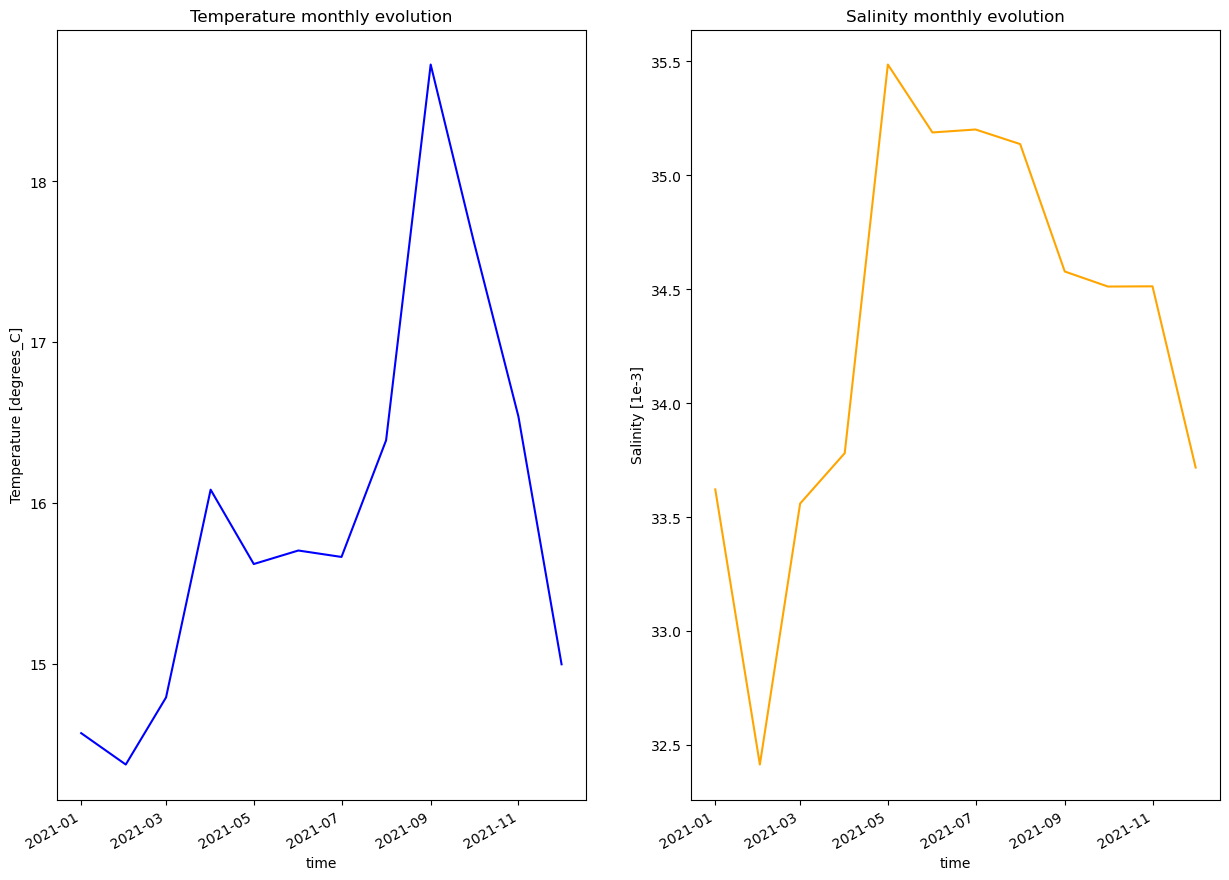

In [32]:
plt.figure(figsize=(15,10))

plt.subplot(1, 2, 1)
t_thetao.plot(color = 'blue')
plt.title(f"{t_thetao.long_name} monthly evolution")

plt.subplot(1, 2, 2)
port_S.plot(color = 'orange')
plt.title(f"{port_S.long_name} monthly evolution")

- plotting the two variables in a same graphic

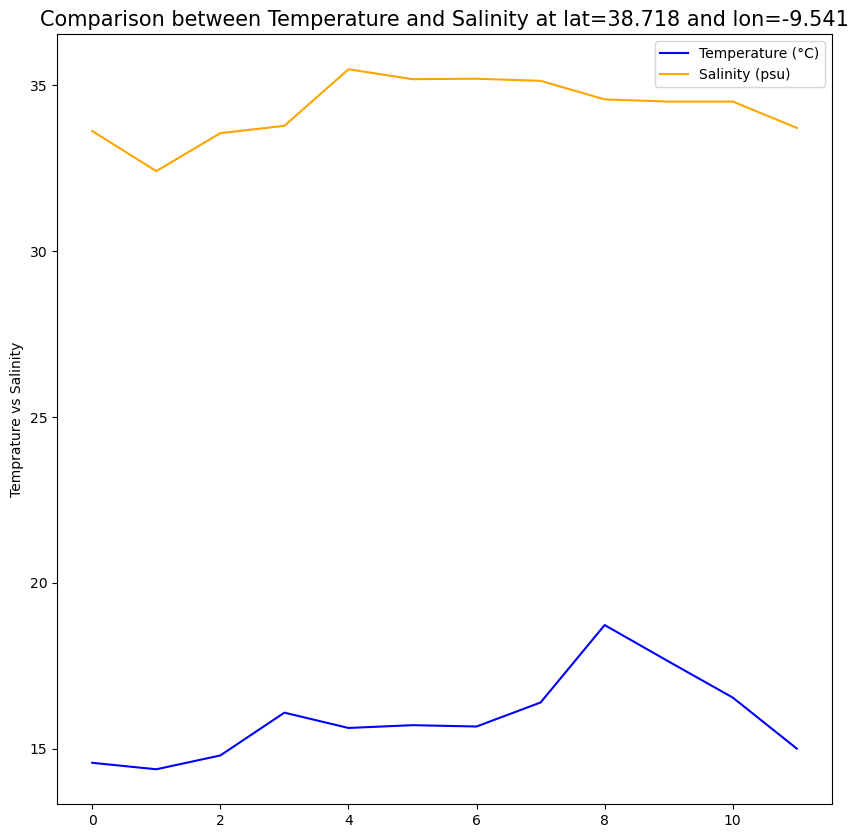

In [33]:
plt.figure(figsize=(10,10))
plt.ylabel("Temprature vs Salinity")
plt.title(f"Comparison between Temperature and Salinity at lat={gridpoint_lat} and lon={gridpoint_lon}", fontsize=15)

plt.plot(t_thetao, label = 'Temperature (°C)', color= 'blue')
plt.plot(port_S, label='Salinity (psu)', color = 'orange')
plt.legend()

### Depth Profile
The same plot can be done to observe the depth evolution of a variable on a gridpoint. 

Text(0.5, 1.0, 'Depth profile of Temperature at lat=38.718 and lon=-9.541')

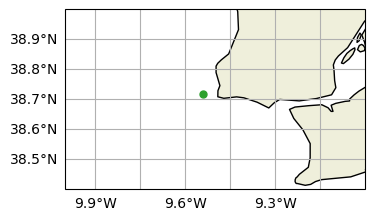

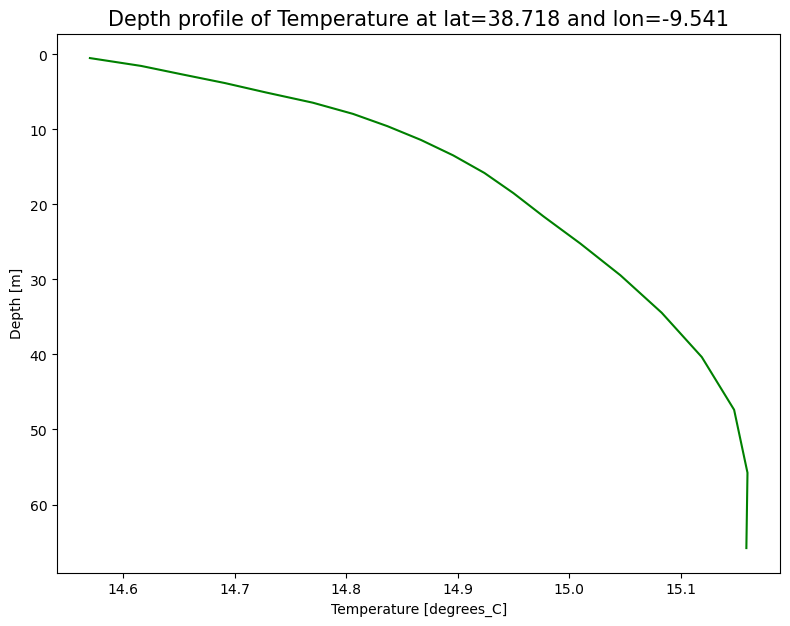

In [35]:
f = plt.figure(figsize=(10,10))   

# Define the parameters (variable, gridpoint, depth range, time) 
d_thetao = DS.thetao.sel(longitude=gridpoint_lon, latitude=gridpoint_lat, method='nearest').isel(depth=slice(0, -1)).sel(time=target_date)

## Display the locations of the glider on a mini map
ax_mini_map = f.add_axes([0.5, 1, 0.3, 0.2], projection=ccrs.PlateCarree())                               # create the minimap and define its projection
gl = ax_mini_map.gridlines(draw_labels=True)                                                              # add the lon/lat gridlines
gl.right_labels = False                                                                                   # remove latitude labels on the right
gl.top_labels = False                                                                                     # remove longitude labels on the top
# Customize mini map
ax_mini_map.add_feature(cfeature.LAND, zorder=0, edgecolor='k')                                           # add land mask 
ax_mini_map.set_extent([-10, -9, 38.4, 39], crs = ccrs.PlateCarree())                            # define the extent of the mini map [lon_min,lon_max,lat_min,lat_max]
ax_mini_map.scatter(gridpoint_lon, gridpoint_lat, 25,'tab:green',transform=ccrs.PlateCarree())       # plot location of point

#plot the vertical profiles
d_thetao.plot(y = 'depth', yincrease=False, color='green', size=7)    # define the parameters to plot

#title
plt.title(f"Depth profile of {d_thetao.long_name} at lat={gridpoint_lat} and lon={gridpoint_lon}", fontsize=15)

---
## Data Extraction
Access through copernicusmarine _open_dataset_ function creates a remote connection and you can virtually explore the data, but no file is stored on your local disk. If you break the connection, you risk losing all the results you have obtained.

**Do not panic!** \
In this section we will show you how to save data, in any format you want! We will focus on the netCDF file format.

In the [package documentation](https://docs.xarray.dev/en/latest/api.html), an exhaustive list of data conversion formats is available, so feel free to check it out!

In [37]:
# data storage in NetCDF format 
nc_file = subset_T.to_netcdf("CMEMS_Portugal_2021-monhtly.nc")

---
## 6. Conclusion

<div class="alert alert-block alert-success">
    <b>CONGRATULATIONS!!</b> 👏<br>
  
    


We hope you enjoyed this training on how to open and explore Copernicus Marine data, for free, thanks to the European Commission.

This training course is over but we'd love to hear from you about how we could improve it (topics, tools, storytelling, format, speed, etc.).
    
<div style='border: solid 0.5px; padding-left:0.7em; padding-bottom:0.7em;' >
<em><h5><b>📌 Note:</b></h5>
   For more application examples and use cases (and if you want to explore the files further), we offer a wide selection of trainings and scripts in our <a href="https://marine.copernicus.eu/services/user-learning-services/tutorials">E-learning materials</a> section!
</em>
    </div>
    
<br />    
If you have any questions and/or problems, please do not hesitate to contact the Copernicus Marine Support team:
<ul>
    <li>through a <b>chat session</b> available in the bottom right corner of any Copernicus Marine webpage</li>
</ul>

[Go back to the "Table of contents"](#Table-of-contents)
</div>

---
## Para pasar a CSV

In [ ]:
import xarray as xr
DS = xr.open_dataset("input_filename.nc")
DS.to_dataframe().to_csv("output_filename.csv")